In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv('产品设计.csv') 

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

author_counts=df['author'].value_counts()[:10].sort_values(ascending=False) 
author = pd.DataFrame(author_counts)
fig = plt.figure(figsize=(14,7)) 
plt.bar(author.index, author.author,color = '#4584b6',edgecolor = '#4584b6') 

plt.title('top 10 author') 
plt.xlabel('author')
plt.ylabel('counts')
plt.show()

<Figure size 1400x700 with 1 Axes>

Text(0.5,1,'author_thumb')

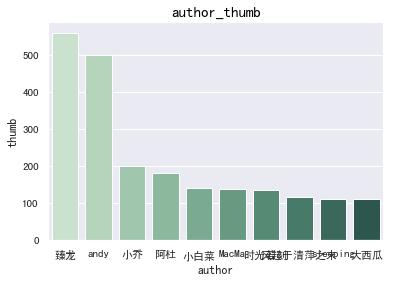

In [3]:
import seaborn as sns
sns.set(font='SimHei') 
# sns.set(rc={'figure.figsize':(14,7)})
pd_df = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False) [:10]
ax = sns.barplot(x='author', y='thumb',data=pd_df,palette=("ch:2.5,-.2,dark=.3")) 
plt.title('author_thumb', color='black', fontsize=15, weight='bold')

Text(0.5,1,'thumb with favorite count')

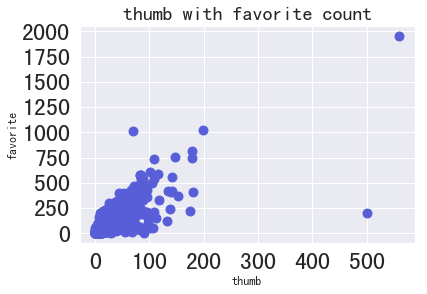

In [4]:
thumb_favorite = df[['thumb','favorite']]
ax4 = thumb_favorite.plot(kind = 'scatter',x='thumb',y='favorite',color = '#575ed8',s=80,fontsize=24)
ax4.set_title("thumb with favorite count",fontsize=20)

In [5]:
import plotly
import plotly.graph_objs as go
df2 = df.groupby(['author'])['favorite'].mean().reset_index().sort_values("favorite",ascending=False)
df2_1 =df2[:10]
data = [go.Bar(x=df2.author, y=df2_1.favorite)]
plotly.offline.plot(data, filename='author_with_favorite_bar')

/Users/huashanzeng/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:621: UserWarning:

Your filename `author_with_favorite_bar` didn't end with .html. Adding .html to the end of your file.



'file:///Users/huashanzeng/Untitled Folder/author_with_favorite_bar.html'

In [6]:
import pyecharts
from pyecharts import Bar

df3 = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False)
df3_1 = df3[:10]
attr = df3_1.author
v2 = df3_1.thumb
bar = Bar("authors by thumb")
bar.add("thumb", attr, v2, mark_line=["average"])
attr = df2_1.author
v2 = df2_1.favorite
bar_1 = Bar("authors by favorite")
bar_1.add("by favorite", attr, v2, mark_line=["average"])

bar

In [7]:
import pyecharts
from pyecharts import Pie

pie = Pie('分类浏览中点赞超50的"受欢迎文章"所占的比例', "数据来源：人人都是产品经理", title_pos='center')
style = Style()
pie_style = style.add(label_pos="center", is_label_show=True, label_text_color=None)
pie.add("", ["AI人工智能", ""], [25, 75], center=[15, 30], radius=[18, 24], **pie_style)
pie.add("", ["blockchain", ""], [24, 76], center=[30, 30], radius=[18, 24], **pie_style)
pie.add("", ["业界动态", ""], [14, 86], center=[45, 30], radius=[18, 24], **pie_style)
pie.add("", ["交互体验", ""], [11, 89], center=[60, 30], radius=[18, 24], **pie_style)
pie.add("", ["产品经理", ""], [27, 73], center=[75, 30], radius=[18, 24], **pie_style)
pie.add("", ["产品运营", ""], [15, 85], center=[90, 30], radius=[18, 24], **pie_style)
pie.add("", ["分析评测", ""], [54, 46], center=[15, 75], radius=[18, 24], **pie_style)
pie.add("", ["创业学院", ""], [26, 74], center=[30, 75], radius=[18, 24], **pie_style)
pie.add("", ["职场攻略", ""], [26, 74], center=[45, 75], radius=[18, 24], **pie_style)
pie.add("", ["营销推广", ""], [26, 74], center=[60, 75], radius=[18, 24], **pie_style)
pie.add("", ["原型设计", ""], [25, 75], center=[75, 75], radius=[18, 24], **pie_style)
pie.add("", ["产品设计", ""], [28, 72], center=[90, 75], radius=[18, 24], legend_top="center", **pie_style)
pie.render()
pie

NameError: name 'Style' is not defined

In [3]:
df["author"].describe()

count      2988
unique     1162
top       Alice
freq        107
Name: author, dtype: object

In [ ]:
df[df["thumb"]>50].describe()

In [ ]:
df[df["favorite"]>50].describe()

In [8]:
bar_1

In [2]:
df[(df["thumb"]>50)&(df["favorite"]>50)].describe()

,Unnamed: 0,favorite,thumb
count,155.000000,155.000000,155.000000
mean,1770.954839,323.348387,85.380645
std,813.267957,212.244670,58.520312
min,51.000000,51.000000,51.000000
25%,1061.500000,207.000000,60.500000
50%,1914.000000,287.000000,71.000000
75%,2445.500000,397.500000,88.000000
max,2985.000000,1956.000000,560.000000
